In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

from modeling import simple_split

In [2]:
train_df = pd.read_csv('train_df.csv')

### 1.1 Modeling

In [3]:
target_df = pd.read_csv('2_sec_target.csv')

In [4]:
(X_train, Y_train), (X_test, Y_test) = simple_split(train_df, target_df, fraction=0.8)
(X_train, Y_train), (X_val, Y_val) = simple_split(X_train, Y_train, fraction=0.8)
X_train.shape, X_val.shape, X_test.shape

((443948, 42), (110987, 42), (138734, 42))

In [5]:
print("Train positive fraction:", Y_train.mean())
print("Validation positive fraction:", Y_val.mean()) 
print("Test positive fraction:", Y_test.mean())

Train positive fraction: 2_sec    0.731153
dtype: float64
Validation positive fraction: 2_sec    0.674547
dtype: float64
Test positive fraction: 2_sec    0.674362
dtype: float64


In [6]:
train_pool = Pool(data=X_train, label=Y_train)
val_pool = Pool(data=X_val, label=Y_val)

In [7]:
model_d3 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d4 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=4,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

model_d5 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=5,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=[1.0, 1.77],
)

In [8]:
model_d3.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500,
)

0:	test: 0.5180180	best: 0.5180180 (0)	total: 98.8ms	remaining: 8m 14s
1:	test: 0.5281442	best: 0.5281442 (1)	total: 121ms	remaining: 5m 1s
2:	test: 0.5439161	best: 0.5439161 (2)	total: 140ms	remaining: 3m 53s
3:	test: 0.5565004	best: 0.5565004 (3)	total: 163ms	remaining: 3m 23s
4:	test: 0.5589077	best: 0.5589077 (4)	total: 182ms	remaining: 3m 2s
5:	test: 0.5593904	best: 0.5593904 (5)	total: 199ms	remaining: 2m 45s
6:	test: 0.6241277	best: 0.6241277 (6)	total: 219ms	remaining: 2m 36s
7:	test: 0.6255861	best: 0.6255861 (7)	total: 247ms	remaining: 2m 34s
8:	test: 0.6258018	best: 0.6258018 (8)	total: 268ms	remaining: 2m 28s
9:	test: 0.6250700	best: 0.6258018 (8)	total: 287ms	remaining: 2m 22s
10:	test: 0.6243265	best: 0.6258018 (8)	total: 307ms	remaining: 2m 19s
11:	test: 0.6254444	best: 0.6258018 (8)	total: 332ms	remaining: 2m 17s
12:	test: 0.6309609	best: 0.6309609 (12)	total: 357ms	remaining: 2m 17s
13:	test: 0.6302702	best: 0.6309609 (12)	total: 382ms	remaining: 2m 16s
14:	test: 0.629

In [9]:
model_d4.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

Learning rate set to 0.070917
0:	test: 0.5166441	best: 0.5166441 (0)	total: 51.8ms	remaining: 4m 18s
1:	test: 0.5324151	best: 0.5324151 (1)	total: 85.4ms	remaining: 3m 33s
2:	test: 0.5288707	best: 0.5324151 (1)	total: 126ms	remaining: 3m 29s
3:	test: 0.5483996	best: 0.5483996 (3)	total: 163ms	remaining: 3m 23s
4:	test: 0.5642376	best: 0.5642376 (4)	total: 199ms	remaining: 3m 19s
5:	test: 0.6153077	best: 0.6153077 (5)	total: 241ms	remaining: 3m 20s
6:	test: 0.6187560	best: 0.6187560 (6)	total: 281ms	remaining: 3m 20s
7:	test: 0.6188092	best: 0.6188092 (7)	total: 301ms	remaining: 3m 8s
8:	test: 0.6242624	best: 0.6242624 (8)	total: 324ms	remaining: 2m 59s
9:	test: 0.6253316	best: 0.6253316 (9)	total: 344ms	remaining: 2m 51s
10:	test: 0.6404641	best: 0.6404641 (10)	total: 368ms	remaining: 2m 47s
11:	test: 0.6405701	best: 0.6405701 (11)	total: 401ms	remaining: 2m 46s
12:	test: 0.6403350	best: 0.6405701 (11)	total: 434ms	remaining: 2m 46s
13:	test: 0.6420633	best: 0.6420633 (13)	total: 465ms

In [10]:
model_d5.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

0:	test: 0.5254805	best: 0.5254805 (0)	total: 32.4ms	remaining: 2m 42s
1:	test: 0.5507994	best: 0.5507994 (1)	total: 63.9ms	remaining: 2m 39s
2:	test: 0.5585447	best: 0.5585447 (2)	total: 99ms	remaining: 2m 44s
3:	test: 0.6351457	best: 0.6351457 (3)	total: 139ms	remaining: 2m 53s
4:	test: 0.6436896	best: 0.6436896 (4)	total: 180ms	remaining: 3m
5:	test: 0.6501083	best: 0.6501083 (5)	total: 225ms	remaining: 3m 7s
6:	test: 0.6519481	best: 0.6519481 (6)	total: 275ms	remaining: 3m 16s
7:	test: 0.6523113	best: 0.6523113 (7)	total: 304ms	remaining: 3m 9s
8:	test: 0.6522538	best: 0.6523113 (7)	total: 346ms	remaining: 3m 11s
9:	test: 0.6517111	best: 0.6523113 (7)	total: 394ms	remaining: 3m 16s
10:	test: 0.6496229	best: 0.6523113 (7)	total: 436ms	remaining: 3m 17s
11:	test: 0.6524186	best: 0.6524186 (11)	total: 479ms	remaining: 3m 18s
12:	test: 0.6517100	best: 0.6524186 (11)	total: 508ms	remaining: 3m 14s
13:	test: 0.6607654	best: 0.6607654 (13)	total: 534ms	remaining: 3m 10s
14:	test: 0.660566

In [11]:
not_active_X = X_test[~X_test.active_area].reset_index(drop='index')
not_active_Y= Y_test[~X_test.active_area].reset_index(drop='index')
not_active_pool = Pool(data=not_active_X, label=not_active_Y)
not_active_Y.value_counts()

2_sec
False    1800
True     1457
Name: count, dtype: int64

In [12]:
passive_X = X_test[X_test.passive_area].reset_index(drop='index')
passive_Y = Y_test[X_test.passive_area].reset_index(drop='index')
passive_pool = Pool(data=passive_X, label=passive_Y)
passive_Y.value_counts()

2_sec
True     1426
False     816
Name: count, dtype: int64

In [13]:
active_X = X_test[X_test.active_area].reset_index(drop='index')
active_Y = Y_test[X_test.active_area].reset_index(drop='index')
active_pool = Pool(data=active_X, label=active_Y)
active_Y.value_counts()

2_sec
True     92100
False    43377
Name: count, dtype: int64

In [14]:
from metrics import calculate_metrics

AUC: 0.8751
AP: 0.7660
Precision: 0.7153
Recall: 0.9382


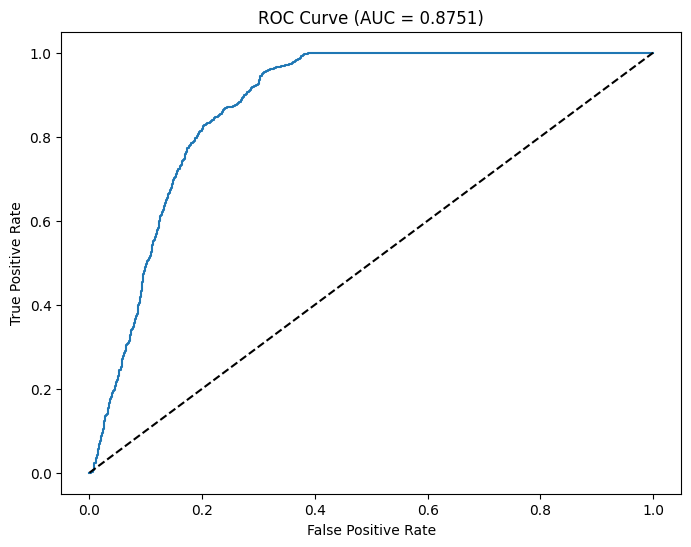

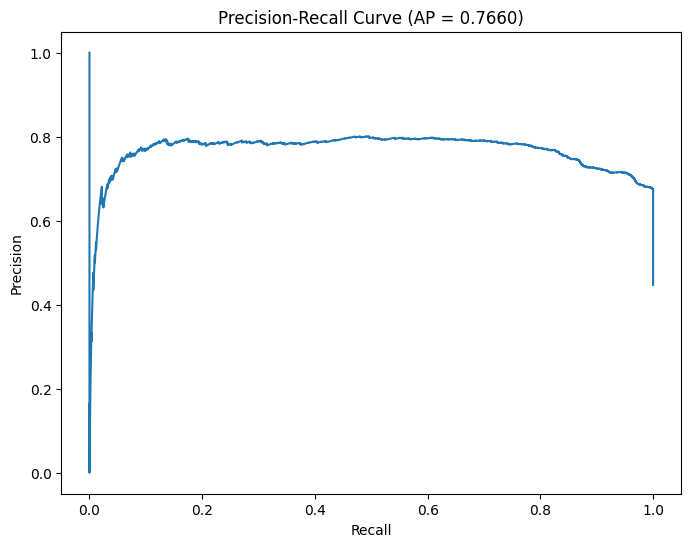

In [15]:
calculate_metrics(model_d5, not_active_pool, 'metrics/modeling_2_sec_momentum/non_active')

AUC: 0.7411
AP: 0.7688
Precision: 0.7203
Recall: 0.9677


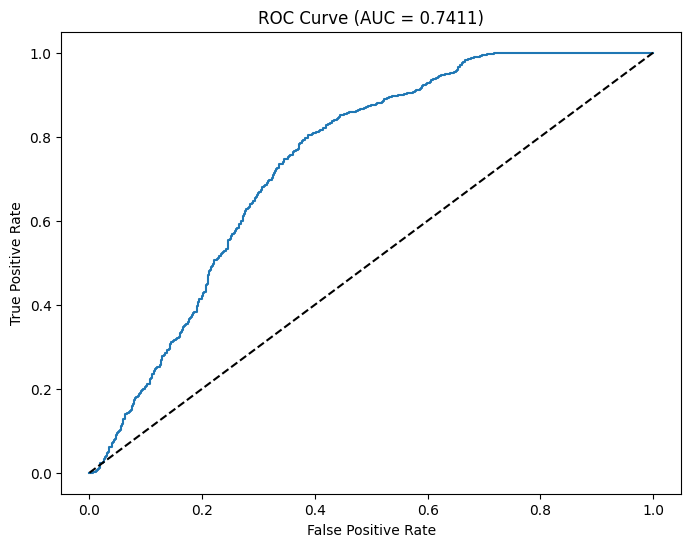

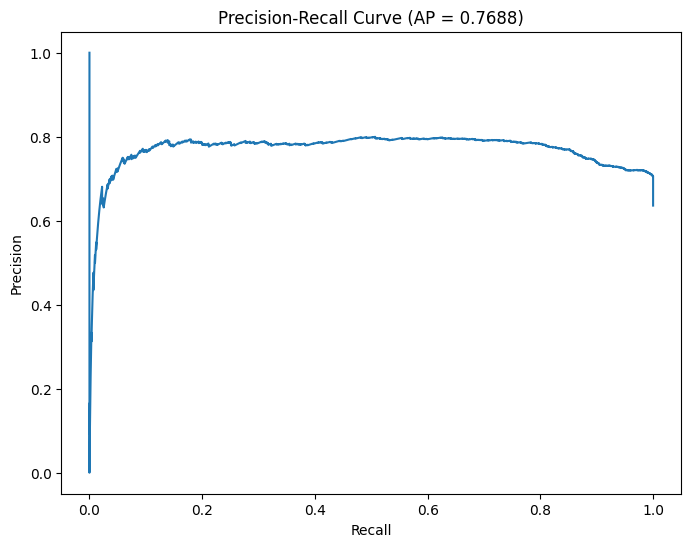

In [16]:
calculate_metrics(model_d5, passive_pool, 'metrics/modeling_2_sec_momentum/passive')

AUC: 0.6722
AP: 0.7892
Precision: 0.6842
Recall: 0.9961


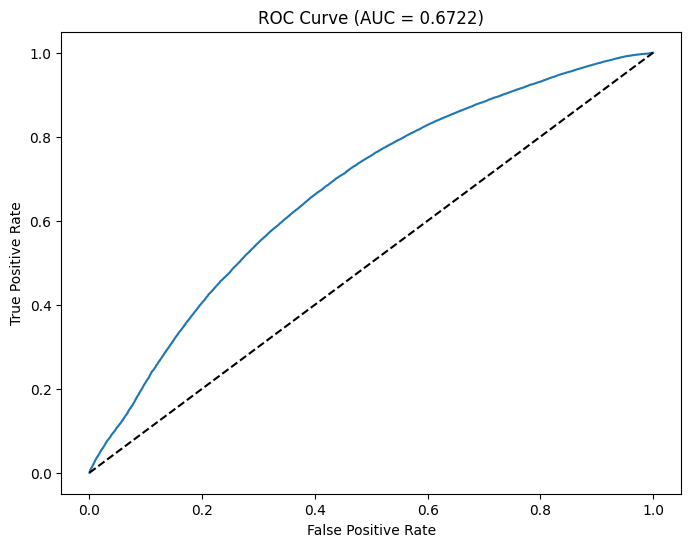

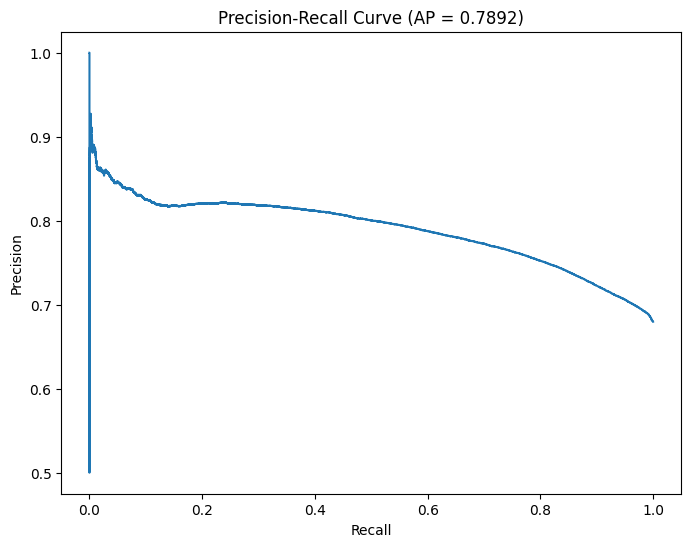

In [17]:
calculate_metrics(model_d5, active_pool, 'metrics/modeling_2_sec_momentum/active')